In [1]:
import pandas as pd
import numpy as np
#import matplotlib as plt
%matplotlib inline

In [3]:
ldf1 = pd.read_csv('data/loan1.csv', low_memory=False)
ldf2 = pd.read_csv('data/loan2.csv', low_memory=False)
ldf3 = pd.read_csv('data/loan3.csv', low_memory=False)
ldf4 = pd.read_csv('data/loan4.csv', low_memory=False)

In [5]:
df = ldf1
df = df.append(ldf2)
df = df.append(ldf3)
df = df.append(ldf4)

In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_co

In [7]:
df.groupby(df.addr_state).size()

addr_state
AK      1947
AL      9532
AR      5600
AZ     17324
CA    111932
CO     16114
CT     11585
DC      2122
DE      2153
FL     51799
GA     24656
HI      3946
IA        14
ID        12
IL     30241
IN     11551
KS      6765
KY      7256
LA      9116
MA     17711
MD     17889
ME        32
MI     19436
MN     13582
MO     12048
MS      2995
MT      2201
NC     21084
ND        76
NE       533
NH      3669
NJ     28600
NM      4215
NV     10696
NY     63431
OH     25227
OK      6864
OR      9469
PA     26841
RI      3374
SC      9059
SD      1562
TN     10667
TX     60135
UT      5390
VA     22509
VT      1531
WA     16828
WI      9839
WV      3934
WY      1786
dtype: int64

In [8]:
df.total_acc.groupby(df.loan_status).count()

loan_status
Charged Off                                              38029
Current                                                 520784
Default                                                    199
Does not meet the credit policy.  Status:Charged Off       758
Does not meet the credit policy.  Status:Current            15
Does not meet the credit policy.  Status:Fully Paid       1947
Fully Paid                                              176203
In Grace Period                                           6486
Issued                                                     142
Late (16-30 days)                                         2337
Late (31-120 days)                                        9949
dtype: int64

In [9]:
df["badloan"]=df.loan_status

In [10]:
df=df.dropna(subset=['badloan'])  

In [11]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,badloan
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,759,755,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Fully Paid
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,534,530,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Charged Off
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,664,660,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Fully Paid
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,579,575,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Fully Paid
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,669,665,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Current
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,694,690,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Fully Paid
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170.08,C,C5,...,629,625,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Current
7,1072053,1288686,3000,3000,3000,36 months,18.64%,109.43,E,E1,...,689,685,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Fully Paid
8,1071795,1306957,5600,5600,5600,60 months,21.28%,152.39,F,F2,...,499,0,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Charged Off
9,1071570,1306721,5375,5375,5350,60 months,12.69%,121.45,B,B5,...,499,0,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Charged Off


In [12]:
#Classify loans as in good or bad standing
def lstat(status):
    if status == "Charged Off" or status == "Default" or status == "Does not meet the credit policy.  Status:Charged Off":
        return "Bad"
    else:
        return "Good"

In [13]:
df.badloan=df.badloan.apply(lstat)

In [14]:
df.badloan

0         Good
1          Bad
2         Good
3         Good
4         Good
5         Good
6         Good
7         Good
8          Bad
9          Bad
10        Good
11        Good
12         Bad
13        Good
14         Bad
15        Good
16        Good
17        Good
18        Good
19        Good
20        Good
21         Bad
22        Good
23        Good
24         Bad
25        Good
26         Bad
27         Bad
28        Good
29        Good
          ... 
290561    Good
290562    Good
290563    Good
290564    Good
290565    Good
290566    Good
290567    Good
290568    Good
290569    Good
290570    Good
290571    Good
290572    Good
290573    Good
290574    Good
290575    Good
290576    Good
290577    Good
290578    Good
290579    Good
290580    Good
290581    Good
290582    Good
290583    Good
290584    Good
290585    Good
290586    Good
290587    Good
290588    Good
290589    Good
290590    Good
Name: badloan, dtype: object

In [15]:
df.fico_range_low.convert_objects(convert_numeric=True)
df.fico_range_high.convert_objects(convert_numeric=True)

C:\Users\Nolo42\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Users\Nolo42\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


0         739
1         744
2         739
3         694
4         699
5         734
6         694
7         664
8         679
9         729
10        699
11        679
12        714
13        709
14        724
15        669
16        674
17        764
18        689
19        759
20        729
21        709
22        694
23        714
24        694
25        734
26        699
27        679
28        684
29        699
         ... 
290561    709
290562    674
290563    674
290564    694
290565    744
290566    724
290567    679
290568    709
290569    674
290570    679
290571    729
290572    704
290573    759
290574    689
290575    684
290576    714
290577    829
290578    669
290579    749
290580    674
290581    674
290582    684
290583    674
290584    689
290585    684
290586    674
290587    664
290588    684
290589    699
290590    679
Name: fico_range_high, dtype: float64

In [16]:
df["fico_range_average"]=(df.fico_range_low+df.fico_range_high)/2
df["last_fico_range_average"]=(df.last_fico_range_low+df.last_fico_range_high)/2

In [17]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,badloan,fico_range_average,last_fico_range_average
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Good,737,757
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Bad,742,532
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Good,737,662
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Good,692,577
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,Good,697,667


In [18]:
statusficodf=df[['badloan','fico_range_average']]

In [19]:
statusficodf.groupby(statusficodf.badloan).mean()

,fico_range_average
badloan,
Bad,691.893213
Good,697.298083


The difference between average fico scores between the the good loan and bad loans is not meaningfully different. This is the expected result, the Lending Club has a selection process for issuing loan andtherefore the fico scores are taken into account in their model so the two sub-groups should not be meaningfully different. If the two groups were different, it would give the Lending Club a new dimension to consider when issuing a loan.

In [20]:
badloanstatedf=df[['badloan','addr_state']]

In [21]:
blsdf=badloanstatedf.groupby(['badloan','addr_state']).size()

In [22]:
blsdf=blsdf.unstack('addr_state')

In [23]:
blsdf.T

badloan,Bad,Good
addr_state,,
AK,82,1865
AL,567,8965
AR,276,5324
AZ,885,16439
CA,6464,105468
CO,677,15437
CT,539,11046
DC,80,2042
DE,106,2047


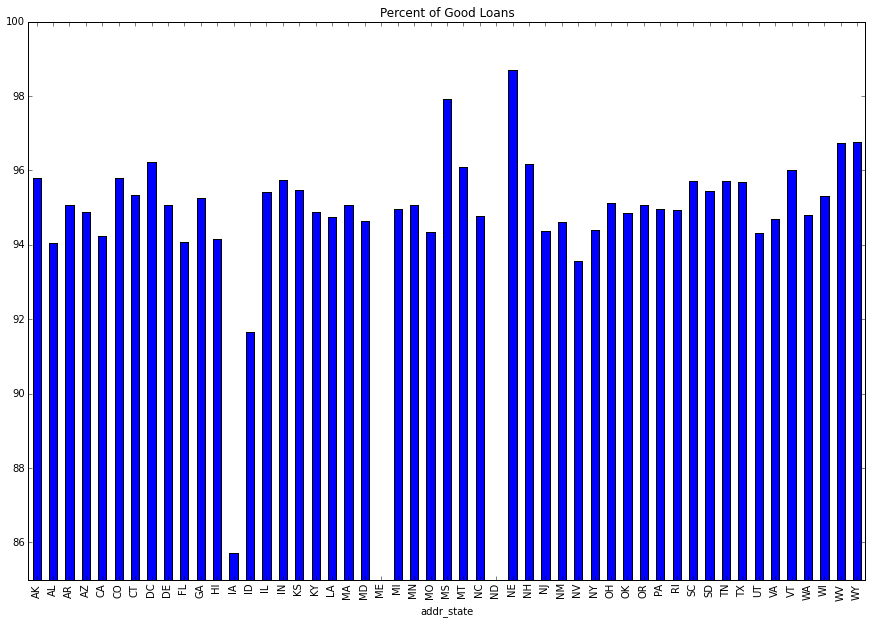

In [24]:
((blsdf.iloc[1,:]/(blsdf.iloc[0,:]+blsdf.iloc[1,:]))*100).plot(title='Percent of Good Loans', figsize=(15,10), kind="bar", ylim=(85,100))

        